In [183]:
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
import seaborn as sns


# Goal

Our goal is to find optimal **bag configuration**

We have the following data:

- `design.csv` -- design matrix indicating which features each bag has
- `responses_online_1.csv` -- survey responses by participants in online experiment
- `responses_offline_1.csv` -- survey responses by participants in offline experiment

We will do the following:
1. Estimate Partworth regressions
2. Find optimal (revenue-maximizing) market offering involving 1 bag and 2 bags based on Utility Maximization Framework

In [184]:
design = pd.read_csv('HW1_Files/design.csv', header=None)
design.reset_index(inplace=True)
design.columns = ['bag_id', 'exterior', 'size', 'price', 'strap', 'water', 'interior']

def valueMap(x, values, labels):
    return labels[values == x][0]

design["exterior"] = design["exterior"].apply(
    lambda x: valueMap(x, values = np.array([1,2,3,4]),
                       labels = np.array(['Black', 'Blue', 'Reflective', 'Colorful']))
    )
design["size"] = design["size"].apply(
    lambda x: valueMap(x, values = np.array([1,2]),
                       labels = np.array(['Small', 'Large']))
    )
design["strap"] = design["strap"].apply(
    lambda x: valueMap(x, values = np.array([1,2]),
                       labels = np.array(['No', 'Yes']))
    )
design["water"] = design["water"].apply(
    lambda x: valueMap(x, values = np.array([1,2]),
                       labels = np.array(['No', 'Yes']))
    )
design["interior"] = design["interior"].apply(
    lambda x: valueMap(x, values = np.array([1,2,3]),
                       labels = np.array(['NoDividers', 'FileDivider', 'LaptopCompartment']))
    )
design["price"] = design["price"].apply(
    lambda x: valueMap(x, values = np.array([1,2,3,4]),
                       labels = np.array([120, 140, 160, 180]))
    )
design = pd.get_dummies(design)
design.head()

,bag_id,price,exterior_Black,exterior_Blue,exterior_Colorful,exterior_Reflective,size_Large,size_Small,strap_No,strap_Yes,water_No,water_Yes,interior_FileDivider,interior_LaptopCompartment,interior_NoDividers
0,0,160,1,0,0,0,0,1,1,0,0,1,0,0,1
1,1,140,0,0,1,0,0,1,0,1,0,1,1,0,0
2,2,120,0,0,0,1,0,1,0,1,1,0,1,0,0
3,3,160,0,1,0,0,0,1,0,1,1,0,0,0,1
4,4,160,0,0,0,1,1,0,1,0,0,1,0,1,0


In [185]:
offline = pd.read_csv('HW1_Files/responses_offline_1.csv', header=None).T
offline.columns = ['part' + str(x) for x in offline.columns]
offline = offline.reset_index()
offline = pd.wide_to_long(df = offline, stubnames='part', 
                          i='index', j='participant').reset_index()
offline.columns = ['bag_id', 'participant', 'rating']
offline = pd.merge(offline, design, on= 'bag_id', how = 'left')
offline.rating = offline.rating.astype(int)
offline.insert(loc = 3, column = 'const', value = 1 )
offline.head()

,bag_id,participant,rating,const,price,exterior_Black,exterior_Blue,exterior_Colorful,exterior_Reflective,size_Large,size_Small,strap_No,strap_Yes,water_No,water_Yes,interior_FileDivider,interior_LaptopCompartment,interior_NoDividers
0,0,0,1,1,160,1,0,0,0,0,1,1,0,0,1,0,0,1
1,1,0,1,1,140,0,0,1,0,0,1,0,1,0,1,1,0,0
2,2,0,3,1,120,0,0,0,1,0,1,0,1,1,0,1,0,0
3,3,0,1,1,160,0,1,0,0,0,1,0,1,1,0,0,0,1
4,4,0,1,1,160,0,0,0,1,1,0,1,0,0,1,0,1,0


In [186]:
online = pd.read_csv('HW1_Files/responses_online_1.csv', header=None).T
online.columns = ['part' + str(x) for x in online.columns]
online = online.reset_index()
online = pd.wide_to_long(df = online, stubnames='part', 
                          i='index', j='participant').reset_index()
online.columns = ['bag_id', 'participant', 'rating']
online = pd.merge(online, design, on= 'bag_id', how = 'left')
online.rating = online.rating.astype(int)
online.insert(loc = 3, column = 'const', value = 1 )
online.head()

,bag_id,participant,rating,const,price,exterior_Black,exterior_Blue,exterior_Colorful,exterior_Reflective,size_Large,size_Small,strap_No,strap_Yes,water_No,water_Yes,interior_FileDivider,interior_LaptopCompartment,interior_NoDividers
0,0,0,1,1,160,1,0,0,0,0,1,1,0,0,1,0,0,1
1,1,0,1,1,140,0,0,1,0,0,1,0,1,0,1,1,0,0
2,2,0,1,1,120,0,0,0,1,0,1,0,1,1,0,1,0,0
3,3,0,1,1,160,0,1,0,0,0,1,0,1,1,0,0,0,1
4,4,0,1,1,160,0,0,0,1,1,0,1,0,0,1,0,1,0


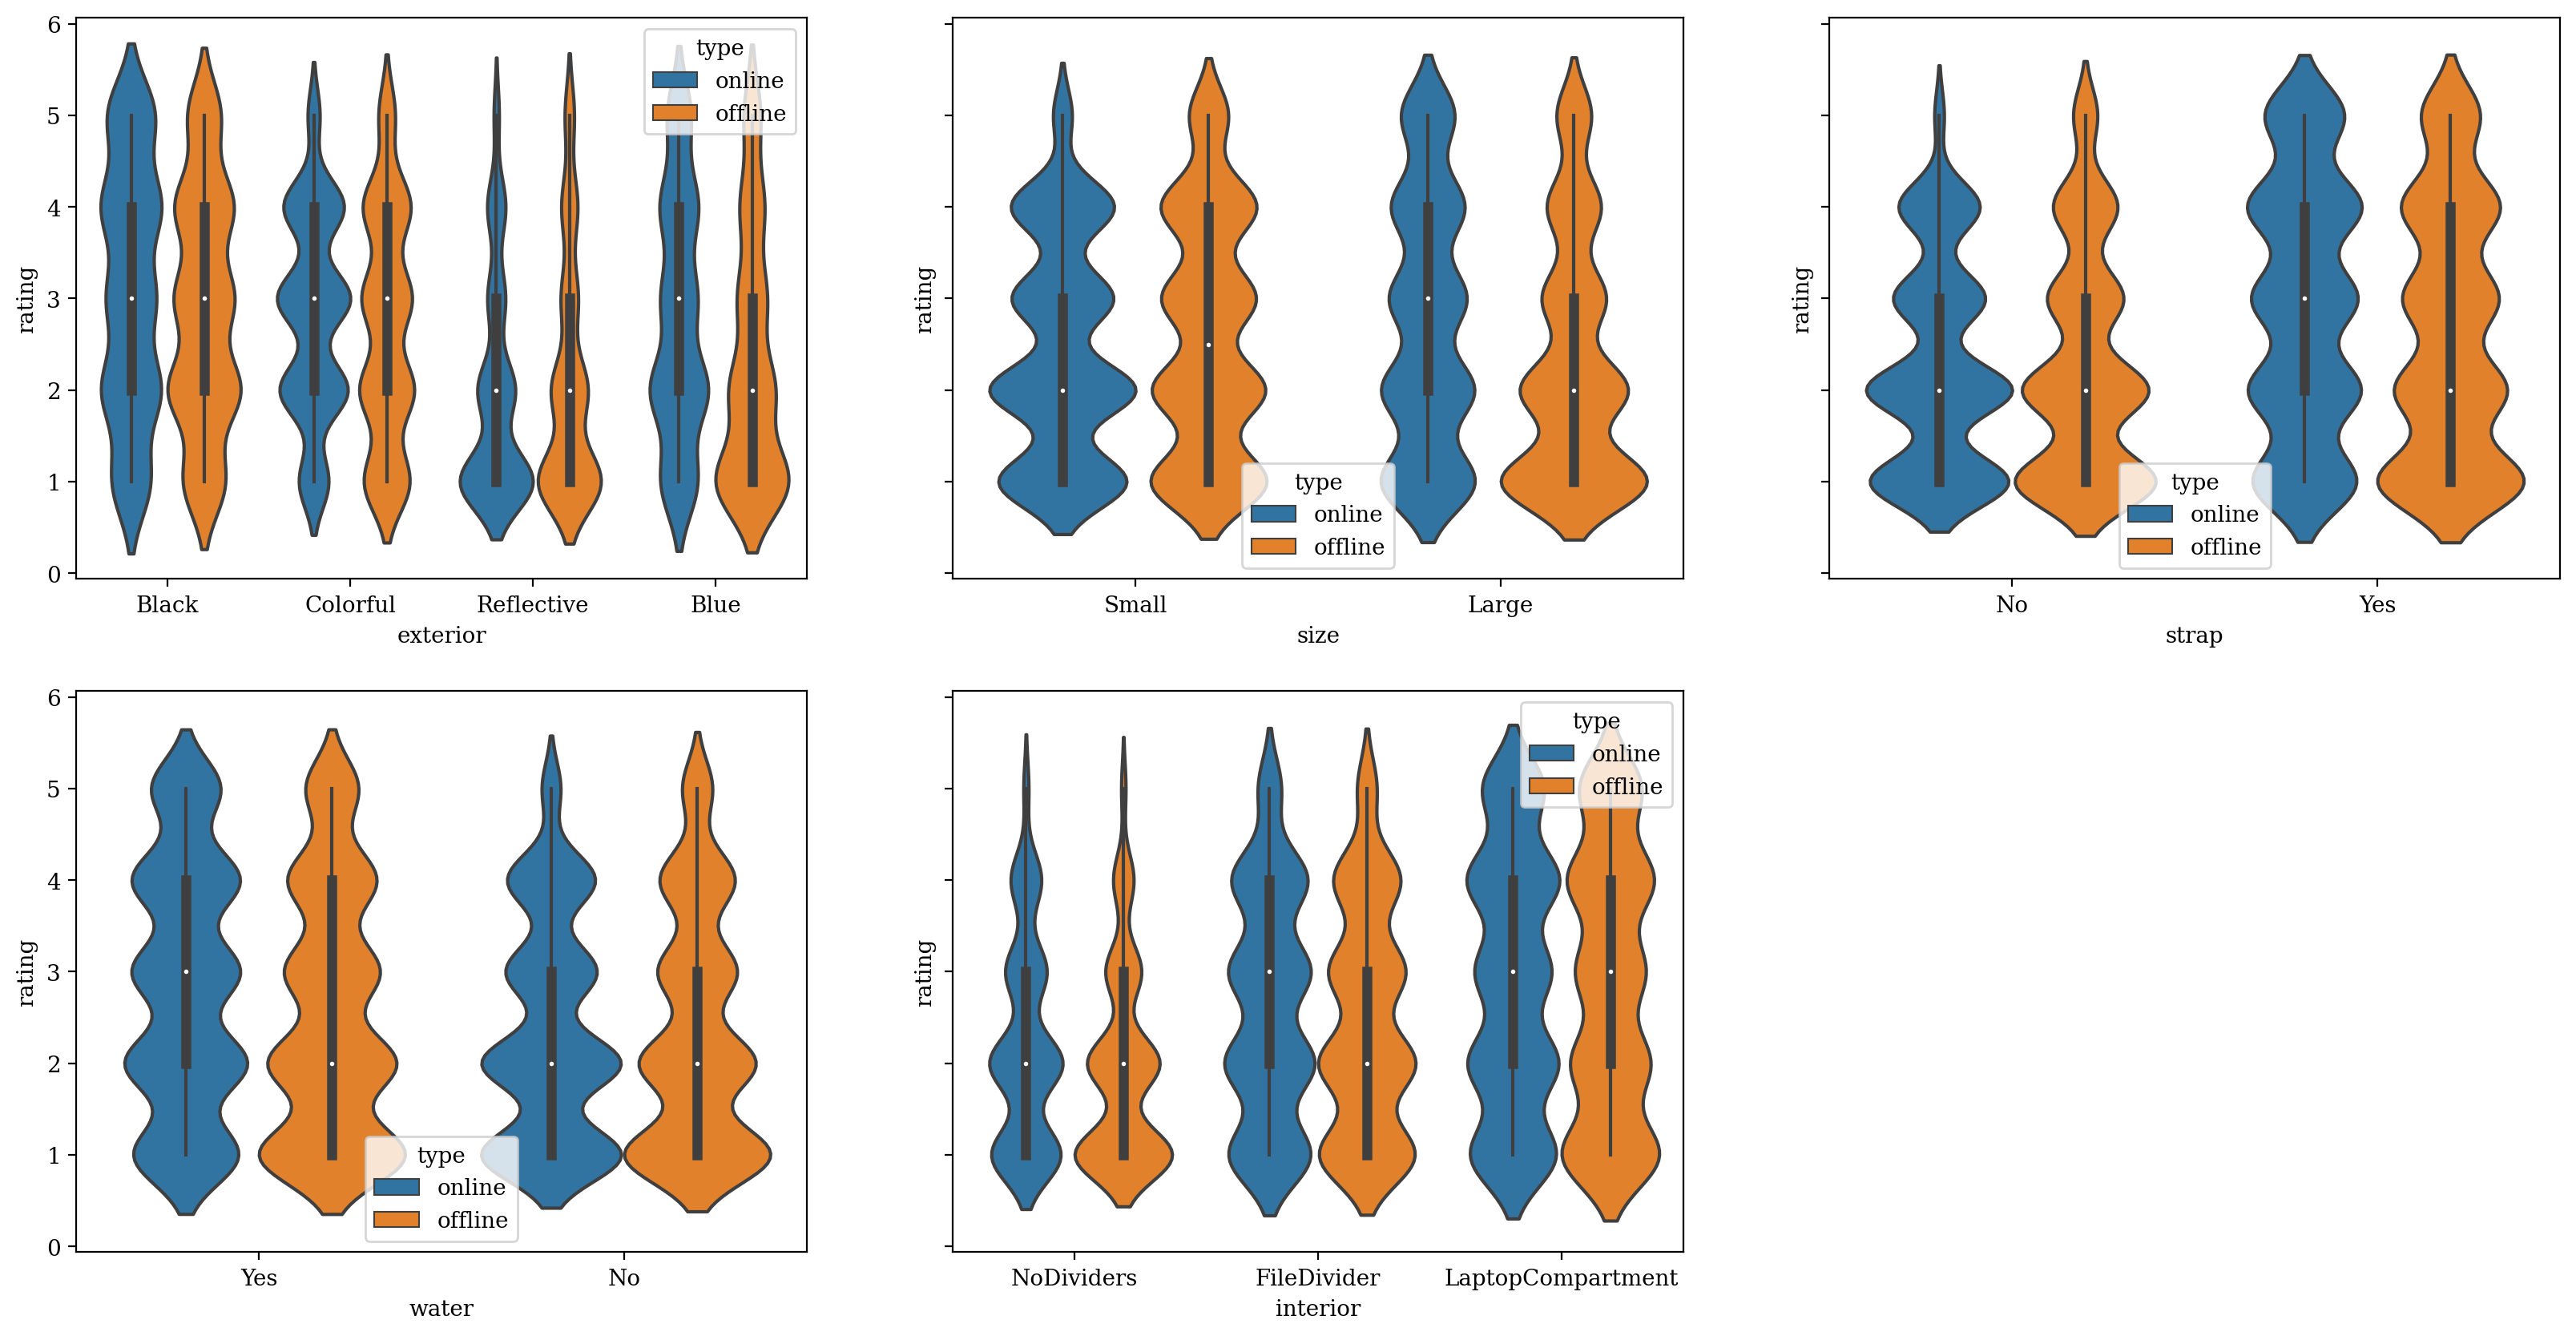

In [187]:
def plot_rating(online, offline, feature, rating, ax):
    as_factor = pd.from_dummies(online.loc[:, [x for x in online.columns if feature in x]], sep = '_')
    tab = online.loc[:, [rating]]
    tab[feature] = as_factor[feature]
    tab['type'] = 'online'

    as_factor = pd.from_dummies(offline.loc[:, [x for x in offline.columns if feature in x]], sep = '_')
    tab2 = offline.loc[:, [rating]]
    tab2[feature] = as_factor[feature]
    tab2['type'] = 'offline'
    tab = pd.concat([tab, tab2])
    sns.violinplot(data=tab, x=feature, y=rating, hue='type',
               scale='area', inner='box', ax=ax)
    pass

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (20,10), sharey=True)
axs = axs.flatten()
plot_rating(online, offline, 'exterior', 'rating', ax = axs[0]);
plot_rating(online, offline, 'size', 'rating', ax = axs[1]);
plot_rating(online, offline, 'strap', 'rating', ax = axs[2]);
plot_rating(online, offline, 'water', 'rating', ax = axs[3]);
plot_rating(online, offline, 'interior', 'rating', ax = axs[4]);
fig.delaxes(axs[5])

$$
\newcommand{\p}{\partial}
\newcommand{\e}{\varepsilon}
$$

# Partworth estimation

We estimate the following regression
$$
r_k = \beta_0 + \sum^J_{j=1}\beta_j x_{jk} + \e_{k}
$$
where $r_k$ is rating for configuration $k$,  $\{\beta_j\}^J_{j=0}$ are coefficients and $\{x_{jk}\}^J_{j=1}$ are binary features of configuration $k$.


In [188]:
# exclude reference categories
online.drop(labels = ['exterior_Black', 'size_Small', 'strap_No', 'water_No', 'interior_NoDividers'], 
            axis = 1, inplace=True)
offline.drop(labels = ['exterior_Black', 'size_Small', 'strap_No', 'water_No', 'interior_NoDividers'],
             axis = 1, inplace=True)

In [211]:
import statsmodels.api as sm
X_on = np.array(online.iloc[:,3:])
y_on = np.array(online.rating)
X_names = online.columns[3:]
model_on = sm.OLS(y_on, X_on, hasconst = True).fit().get_robustcov_results(cov_type = 'HC3')
model_on.summary2(yname = 'Rating', xname = X_names).tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,3.723206,0.179206,20.776163,2.195744e-88,3.371794,4.074617
price,-0.011146,0.001063,-10.482926,3.534297e-25,-0.013231,-0.009061
exterior_Blue,-0.313525,0.071101,-4.409561,1.080885e-05,-0.452950,-0.174100
exterior_Colorful,-0.219932,0.063942,-3.439534,5.925427e-04,-0.345320,-0.094545
exterior_Reflective,-1.064195,0.066630,-15.971641,1.107915e-54,-1.194852,-0.933537
size_Large,0.268033,0.044503,6.022821,1.974295e-09,0.180765,0.355300
strap_Yes,0.510009,0.044916,11.354739,3.760822e-29,0.421932,0.598087
water_Yes,0.448361,0.044503,10.074872,2.042521e-23,0.361093,0.535628
interior_FileDivider,0.407104,0.055130,7.384392,2.093150e-13,0.298997,0.515211
interior_LaptopCompartment,0.619181,0.054166,11.431178,1.635027e-29,0.512965,0.725397


In [212]:
X_off = np.array(offline.iloc[:,3:])
y_off = np.array(offline.rating)
X_names = offline.columns[3:]
model_off = sm.OLS(y_off, X_off, hasconst = True).fit().get_robustcov_results(cov_type = 'HC3')
model_off.summary2(yname = 'Rating', xname = X_names).tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,3.390547,0.188373,17.999141,4.303859e-68,3.021160,3.759935
price,-0.007558,0.001136,-6.653680,3.520061e-11,-0.009786,-0.005331
exterior_Blue,-0.596311,0.079795,-7.473032,1.087137e-13,-0.752785,-0.439838
exterior_Colorful,-0.110051,0.069251,-1.589158,1.121548e-01,-0.245849,0.025746
exterior_Reflective,-0.705680,0.072037,-9.796091,3.003265e-22,-0.846940,-0.564420
size_Large,-0.307377,0.048317,-6.361719,2.376244e-10,-0.402123,-0.212631
strap_Yes,0.253468,0.048656,5.209367,2.054070e-07,0.158056,0.348880
water_Yes,0.169672,0.048317,3.511669,4.534186e-04,0.074926,0.264418
interior_FileDivider,0.519126,0.055304,9.386725,1.374235e-20,0.410677,0.627574
interior_LaptopCompartment,0.877470,0.057903,15.154126,1.228747e-49,0.763925,0.991014


## Individual Level estimates

Now we will estimate the coefficients for each pariticipant, i.e.

$$
r_{ik} = \beta_{i0} + \sum^J_{j=1}\beta_{ij} x_{jk} + \e_{ik}
$$
where $i$ is the index of participant, and coefficients $\{\beta_{ij}\}^J_{j=0}$ are not unique for each participant $i$.

In [165]:
id_on = np.array(online.participant)
id_off = np.array(offline.participant)

In [264]:
coefs_on = {}
for id in set(id_off):
    data_id = offline.loc[offline['participant'] == id, :]
    X = np.array(data_id.iloc[:, 3:])
    y = np.array(data_id['rating'])
    model = sm.OLS(y, X, hasconst = True).fit()
    coefs_on[id] = np.array(model.summary2(yname = 'Rating', xname = X_names).tables[1]['Coef.'])
    
indlevel_off = pd.DataFrame(coefs_on).T
indlevel_off = indlevel_off.reset_index()
indlevel_off.columns = ['participant', *X_names]    
indlevel_off['type'] = 'offline'

In [265]:
coefs_off = {}
for id in set(id_on):
    data_id = online.loc[online['participant'] == id, :]
    X = np.array(data_id.iloc[:, 3:])
    y = np.array(data_id['rating'])
    model = sm.OLS(y, X, hasconst = True).fit()
    coefs_off[id] = np.array(model.summary2(yname = 'Rating', xname = X_names).tables[1]['Coef.'])
    
indlevel_on = pd.DataFrame(coefs_off).T
indlevel_on = indlevel_on.reset_index()
indlevel_on.columns = ['participant', *X_names]  
indlevel_on['type'] = 'online'

In [274]:
indlevel = pd.concat([indlevel_on, indlevel_off], axis=0).reset_index(drop=True)

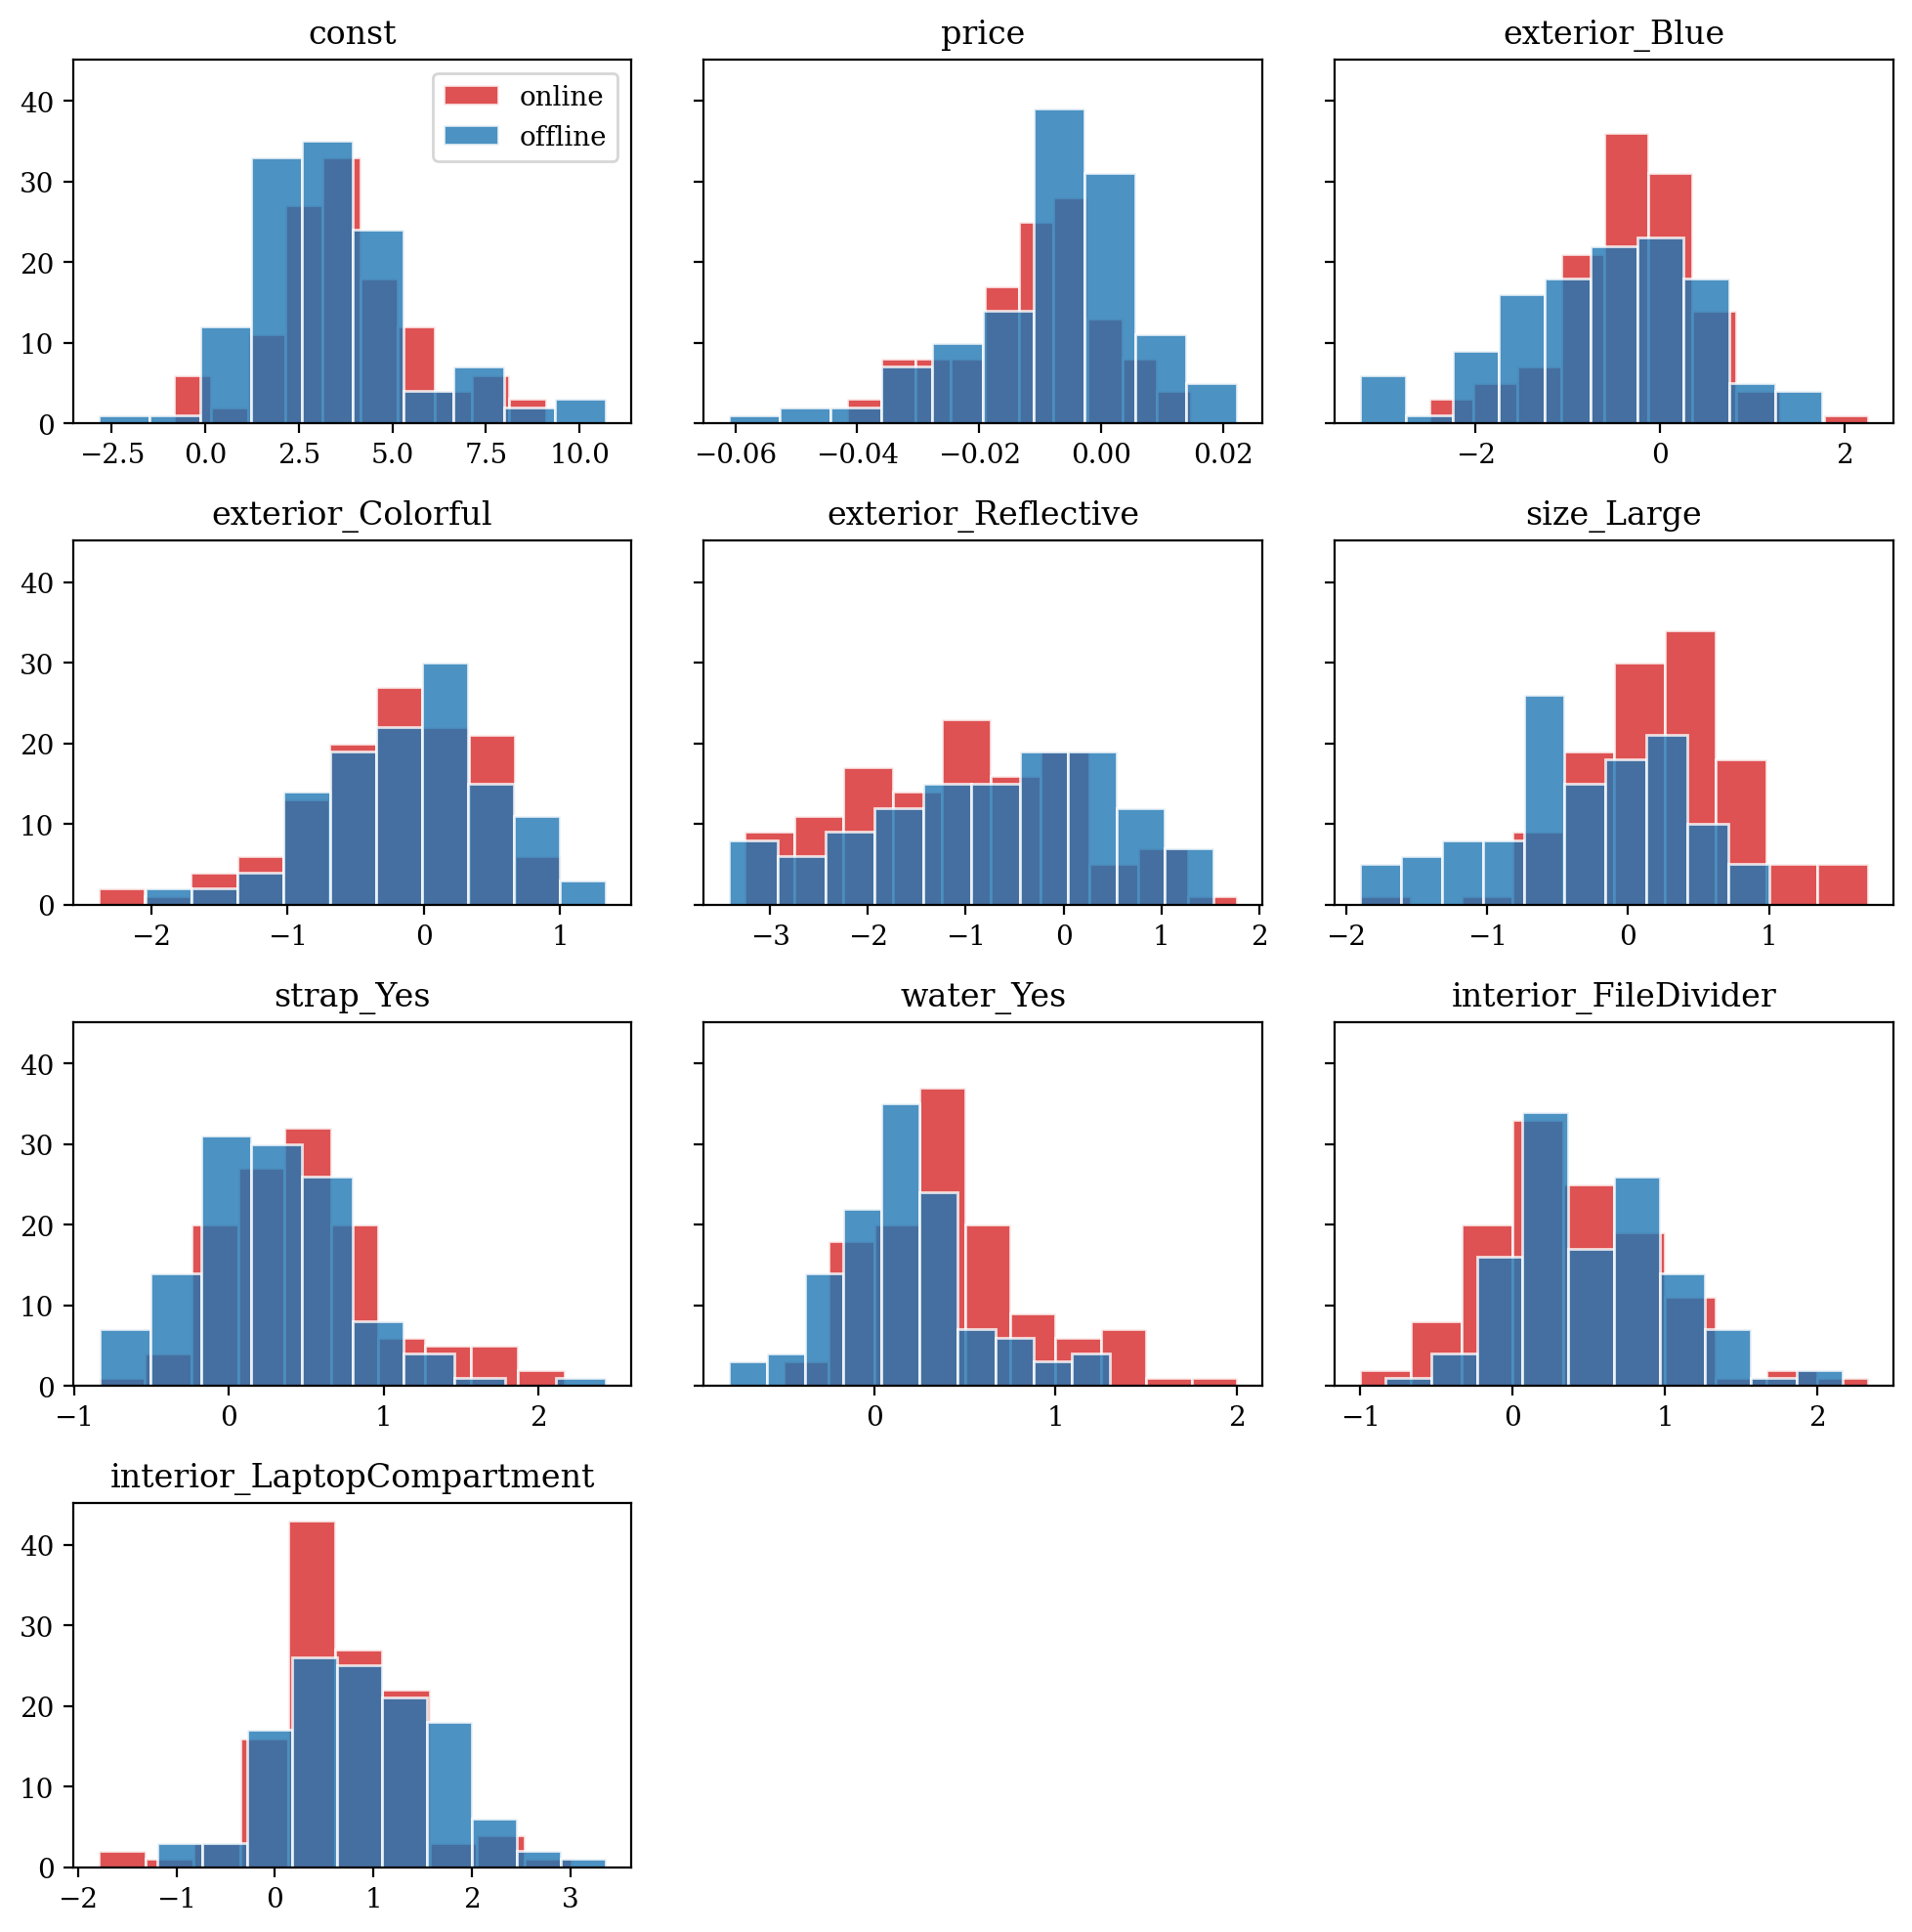

In [275]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, sharey=True, figsize = (10, 10))
axs = axs.flatten()
for i in range(1, indlevel.shape[1]-1):
    axs[i-1].hist(indlevel.loc[indlevel['type'] == 'online', indlevel.columns[i]], 
                  ec = 'white', color = 'tab:red', alpha = 0.8, label = 'online')
    axs[i-1].hist(indlevel.loc[indlevel['type'] == 'offline', indlevel.columns[i]], 
                  ec = 'white', color = 'tab:blue', alpha = 0.8, label = 'offline')
    axs[i-1].set_title(indlevel.columns[i])
plt.tight_layout()
axs[0].legend()
fig.delaxes(axs[11])
fig.delaxes(axs[10])

In [287]:
betas_on = np.array(indlevel_on.iloc[:,1:indlevel_on.shape[1]-1]).astype(float)
betas_off = np.array(indlevel_off.iloc[:,1:indlevel_off.shape[1]-1]).astype(float)

In [289]:
betas_on.shape

(122, 10)

# Revenue Maximizing Configuration

We can think of each bag $j \in \{1, \ldots, J\}$ as a collection of $K$ attributes $\{x_{jk}\}^K_{k=1}$. Thus, a bag is completely characterised by a vector $\bm{x}_j = (x_{j1}, x_{j2}, \ldots, x_{jK})$.

Assume that consumer's utility from a bag $j$ is separable in it's characteristics and is given by
    $$
    U_{ij} = \sum^K_{k=1} u_i(x_{jk}) + \e_{ij}, 
    $$
where $u_i(\cdot)$ is the utility derived by consumer $i$ from characteristic $x_{jk}$ and $\e_{ij}$ follows standard Gumbel extreme value distribution of Type I, iid.

If we further assume that $u_i(x_k)$ is a linear function we get 
    $$
    U_{ij} = \underbrace{\alpha_i + \sum^K_{k=1} \beta_{ijk} x_{jk}}_{V_{ij}} + \e_{ij}
    $$

We can split $U_{ij}$ into an observable component, $V_{ij}$, and a random component, $\e_{ij}$. 

**Estimation**

Without loss of generality, let $p_j = x_{j1}$ be the offered price for the good $j$. Let $\forall k > 1: x_{jk} \in \{0,1\}$, i.e. $x_{jk}$ is the binary characteristic of the good. 

Thus, we can estimate by OLS (assuming that standard assumptions hold):
    $$
    U_{ij} = \alpha_i + \gamma_i p_j + \sum^K_{k=2} \beta_{ijk} x_{jk} + \e_{ij}\\
    $$
where $U_{ij}$ is the reported willingness-to-pay (WTP) of consumer $i$ for good $j$ and $\beta_{ij}$ corresponds to the marginal increase in the WTP associated with feature $k \in \{2, \ldots, K\}$. Thus, predicted WTP is given by
$$
\hat{U}_{ij} = \hat{V}_{ij} = \hat{\alpha}_i + \hat{\gamma}_i p_j + \sum^K_{k=2} \hat{\beta}_{ijk} x_{jk}
$$

**Application**

Let $p_j \in \{120, 140, 160, 180\}$ and consider 4 features of bags

1. exterior design (Black, Blue, Reflective, Colorful)
2. Size (Small, Large)
3. Strap pad (Yes, No)
4. Watter bottle (Yes, No),
5. interior design (Empty with no dividers, Divider for files, Divider for Laptop). 

Due to multicollinearity we need to omit reference categories after binarization. 

**Reference Categories**

For the **Reference category** we take a bag with the following features: black exterior, small size, no strap, no water bottle and interior without dividers. Let $j=1$ denote the reference bag. Thus for consumer $i$ 
        $$
        \hat{U}_{i1} = \hat{V}_{i1} = \hat{\alpha}_i + \hat{\gamma}_i p_1
        $$
corresponds to the estimated WTP for the reference bag.

**Outside option** 

Outside option is simply the utility from not buying (thus, not getting any attributes and not paying) and thus, outside option is set to 
$$
U_{i0} = \e_{i0} \iff  \hat{V}_{i0} = 0
$$

**Utility Maximization**

Each consumer is utility maximizer. Thus, she will prefer bag $j$ over bag $m$ if and only if
$$
U_{ij} \geq U_{im} \iff V_{ij} + \e_{ij} \geq V_{im} + \e_{im} 
$$
or simply 
$$
V_{ij} -  V_{im} \geq \e_{im} - \e_{ij}
$$

Note that the difference of $\e_{ij} - \e_{im}$ follows logistic distribution. Therefore, the probability that consumer chooses bag $j$ over bag $m$ is 
$$
\begin{align*}
P(U_{ij} \geq U_{im}) &= P(\e_{im} - \e_{ij} \leq V_{ij} - V_{im}) \\
&= \frac{\exp(V_{ij})}{\exp(V_{im})+ \exp(V_{ij})}
\end{align*}
$$
Similarly, the probability that consumer $i$ chooses bag $j$ over all other bags is
$$
P_{ij}(\bm{x}_j, \bm{x}_{-j}) = \frac{\exp(V_{ij})}{1 + \sum^J_{j=1}\exp(V_{ij})},
$$
where $1 =\exp(V_{i0}) = \exp(0)$. 

**Expected Revenue**

Suppose that for all $j$ characteristic $x_{j1} = p_j$ denotes price of bag $j$. Then expected sales revenue is 
    $$
    R_j(\bm{x}_j, \bm{x}_{-j}) = \sum_{i \in I} p_{j} P_{ij} = \sum_{i \in I} \frac{p_j \exp(V_{ij})}{1 + \sum^J_{j=1}\exp(V_{ij})}
    $$
where $I$ is the total number of customers.

Note that the choice probability and revenues **depend on other alternatives**

**Offering only one bag**

In this case customers have 2 options:

1. buy the proposed bag
2. buy nothing

Therefore we simply have
$$
R(\bm{x}_j) = \sum_{i\in I} \frac{p \exp(V_{i})}{1 + \exp(V_{i})}
$$
where $V_i$ is the willingess-to-pay for the bag.

Thus firm maximizes 
$$
\sum_{i\in I} p P_i \to \max_{\bm{x}}\\
V_i = \alpha_i + \gamma_i p + \sum^K_{k=2} \beta_{ik} x_k
$$
where $P_i$ is the corresponding probability of bying the bag. Note that maximization is happening with respect to *configuration* $\bm{x}$. Let the space of potential configurations be $\mathcal{X}$, then 
- For our application we have $4$ price levels and $8$ binary features. Moreover, our binary configurations are exclusive, that is 
    - exterior can take only 4 values 
    - size, water and strap can take only 2 values
    - interior can take 3 values
- Thus, actually we have $|\mathcal{X}| = 4\times 4 \times 2 \times 2 \times 2\times 3 = 384$ configurations

In [542]:
# All bag combinations
val_dict =  {'const': [1],
              'price': [120, 140, 160, 180]}
cat_names = X_names[2:]
for cat in cat_names:
    val_dict[cat] = [0,1]

vals = []
for name, val in val_dict.items():
    vals.append(val)
combs = pd.DataFrame(np.array(np.meshgrid(*vals)).T.reshape(-1,len(val_dict.keys())))
combs.columns = X_names

# filter exterior and interior
combs = combs.loc[combs.loc[:, ['exterior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
combs = combs.loc[combs.loc[:, ['interior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
price = np.array(combs.iloc[:, 1]).reshape(-1, 1)
combs = np.array(combs)
combs.shape # (384, 10)

(384, 10)

**Revenue-maximizing bag**

In [553]:
""" Online """
V = combs @ betas_on.T        # willingness to pay
P = np.exp(V)/(1 + np.exp(V)) # probability of bying
ER = (price * P).mean(axis=1) # expected revenue

result = pd.DataFrame(combs)
result.columns = X_names
result.insert(loc = 0, column = 'Purchase Probability', value =  P.mean(axis = 1))
result.insert(loc = 0, column = 'Expected Revenue', value = ER)
result = result.sort_values(by = 'Expected Revenue', ascending=False).head(1).T
result.columns = ['Online']

""" Offline """
V = combs @ betas_off.T        # willingness to pay
P = np.exp(V)/(1 + np.exp(V)) # probability of bying
ER = (price * P).mean(axis=1) # expected revenue

result2 = pd.DataFrame(combs)
result2.columns = X_names
result2.insert(loc = 0, column = 'Purchase Probability', value =  P.mean(axis = 1))
result2.insert(loc = 0, column = 'Expected Revenue', value = ER)
result2 = result2.sort_values(by = 'Expected Revenue', ascending=False).head(1).T
result2.columns = ['Offline']

""" Best Bags """
print("Online: ")
print("         Expected Revenue: ", result.iloc[0, 0])
print("         Purchase Probability: ", result.iloc[1, 0])
print("         No Purchase Probability: ", 1 - result.iloc[1, 0])

print("Offline: ")
print("         Expected Revenue: ", result2.iloc[0, 0])
print("         Purchase Probability: ", result2.iloc[1, 0])
print("         No Purchase Probability: ", 1 - result2.iloc[1, 0])

print("Configurations:")
pd.concat([result, result2], axis=1).iloc[3:, :]

Online: 
         Expected Revenue:  171.88413557684274
         Purchase Probability:  0.9549118643157929
         No Purchase Probability:  0.04508813568420711
Offline: 
         Expected Revenue:  170.3938218726221
         Purchase Probability:  0.9466323437367894
         No Purchase Probability:  0.053367656263210606
Configurations:


,Online,Offline
price,180.0,180.0
exterior_Blue,0.0,0.0
exterior_Colorful,0.0,0.0
exterior_Reflective,0.0,0.0
size_Large,1.0,0.0
strap_Yes,1.0,1.0
water_Yes,1.0,1.0
interior_FileDivider,0.0,0.0
interior_LaptopCompartment,1.0,1.0


## Offering 2 bags 
Now we have 3 options

1. buy good $j$
2. buy good $m$
3. buy nothing

Corresponding probabilities are:
$$
P_{ij} = \frac{\exp (V_{ij})}{1 + \exp(V_{ij}) + \exp(V_{im})}\\
P_{im} = \frac{\exp (V_{im})}{1 + \exp(V_{ij}) + \exp(V_{im})}\\
P_{i0} = 1 - P_{ij} - P_{im}
$$

So producer maximizes
$$
\sum_{i \in I} (p_j P_{ij} + p_m P_{im}) \to \max_{\bm{x}_j, \bm{x}_m}
$$

The space of potential configurations is more complicated now
$$
(\bm{x}_j, \bm{x}_m) \in \mathcal{X} \times \mathcal{X} \text{ s.t. } \bm{x}_j \neq \bm{x}_m
$$
Thus, our space has $384\times 383 = 147072$ configurations

In [554]:
""" configurations """
vals = []
for name, val in val_dict.items():
    vals.append(val)
for name, val in val_dict.items():
    vals.append(val)

combs = pd.DataFrame(np.array(np.meshgrid(*vals)).T.reshape(-1,2*len(val_dict.keys())))
names = ['j_' + x for x in val_dict.keys()]
names.extend(['m_' + x for x in val_dict.keys()])
combs.columns = names

### filtering
combs = combs.loc[combs.loc[:, ['j_exterior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
combs = combs.loc[combs.loc[:, ['j_interior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
combs = combs.loc[combs.loc[:, ['m_exterior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
combs = combs.loc[combs.loc[:, ['m_interior' in x for x in combs.columns]].sum(axis=1) <= 1, :]
combs = combs.drop_duplicates().reset_index(drop=True)

# create indexies 
combs_j = combs.loc[:, ['j_' in x for x in combs.columns]]
comb_index_j = ['_'.join(list(combs_j.iloc[i, :].astype(str))) for i in range(combs_j.shape[0])]
combs_m = combs.loc[:, ['m_' in x for x in combs.columns]]
comb_index_m = ['_'.join(list(combs_m.iloc[i, :].astype(str))) for i in range(combs_m.shape[0])]

# filter duplicates
combs['index_j'] = comb_index_j
combs['index_m'] = comb_index_m
combs = combs.loc[~(combs['index_m'] == combs['index_j']), :].reset_index(drop=True)
combs = combs.drop(labels = ['index_j', 'index_m'], axis=1)

# extract individual
combs_j = combs.loc[:, ['j_' in x for x in combs.columns]]
combs_m = combs.loc[:, ['m_' in x for x in combs.columns]]

In [555]:
price_j = np.array(combs_j.iloc[:, 1]).reshape(-1, 1)
price_m = np.array(combs_m.iloc[:, 1]).reshape(-1, 1)

In [556]:
def find_2best(combs_j, combs_m, price_j, price_m, betas):
    V_j = combs_j @ betas.T
    V_m = combs_m @ betas.T
    denom = 1 + np.exp(V_j) + np.exp(V_m)
    P_j = np.exp(V_j)/denom
    P_m = np.exp(V_m)/denom
    ER = (price_j * P_j + price_m * P_m).mean(axis = 1)

    result = pd.DataFrame(combs).copy(deep=True)
    result.columns = names
    result.insert(loc = 0, column = 'Purchase Probability m', value =  P_j.mean(axis = 1))
    result.insert(loc = 0, column = 'Purchase Probability j', value =  P_m.mean(axis = 1))
    result.insert(loc = 0, column = 'Expected Revenue', value = ER)
    result = result.sort_values(by = 'Expected Revenue', ascending=False).head(1)
    
    bag1 = result.loc[:, ['j_' in x for x in result.columns]].T.reset_index()
    bag1.columns = ['feature', 'Bag 1']
    bag1['feature'] = [x[x.find('j_') + 2:] for x in bag1['feature']]

    bag2 = result.loc[:, ['m_' in x for x in result.columns]].T.reset_index()
    bag2.columns = ['feature', 'Bag 2']
    bag2['feature'] = [x[x.find('m_') + 2:] for x in bag2['feature']]
    best = pd.concat([bag1, bag2.iloc[:, 1]], axis=1)
    print(f"Expected Revenue: {float(result['Expected Revenue'])}")
    print(f"Purchase Probability of Bag 1: {float(result['Purchase Probability j'])}")
    print(f"Purchase Probability of Bag 2: {float(result['Purchase Probability m'])}")
    print("No Purchase Probability: ",
          1 - float(result['Purchase Probability m']) - float(result['Purchase Probability j']))
    return best.iloc[1:, :]

In [557]:
print('='*40, "Online", '='*40)
find_2best(combs_j, combs_m, price_j, price_m, betas_on)

======================================== Online ========================================
Expected Revenue: 175.8915515415395
Purchase Probability of Bag 1: 0.44145673264566065
Purchase Probability of Bag 2: 0.5357185536962256
No Purchase Probability:  0.022824713658113782


,feature,Bag 1,Bag 2
1,price,180,180
2,exterior_Blue,0,0
3,exterior_Colorful,0,1
4,exterior_Reflective,0,0
5,size_Large,1,1
6,strap_Yes,1,1
7,water_Yes,1,1
8,interior_FileDivider,0,0
9,interior_LaptopCompartment,1,1


In [558]:
print('='*40, "Offline", '='*40)
find_2best(combs_j, combs_m, price_j, price_m, betas_off)

======================================== Offline ========================================
Expected Revenue: 175.2750333718289
Purchase Probability of Bag 1: 0.5107030263896516
Purchase Probability of Bag 2: 0.46304715900939797
No Purchase Probability:  0.02624981460095044


,feature,Bag 1,Bag 2
1,price,180,180
2,exterior_Blue,0,0
3,exterior_Colorful,1,0
4,exterior_Reflective,0,0
5,size_Large,0,0
6,strap_Yes,1,1
7,water_Yes,1,1
8,interior_FileDivider,0,0
9,interior_LaptopCompartment,1,1
